In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

In [27]:
# clean time
from fractions import Fraction

def find_best_multiplier(x, max_n=15):
    best_n = 1
    min_error = float('inf')

    for n in range(1, max_n + 1):
        candidate = n * x
        error = abs(candidate - round(candidate))
        
        if error < min_error:
            min_error = error
            best_n = n

            # If error is extremely small, we can stop early
            if error < 1e-9:
                break

    return best_n, round(best_n * x)

In [28]:
# assigning constants

g = 9.81
k = 40
m = 8
tff = 2*np.pi*np.sqrt(m/k)
fps = 50

In [29]:
maxx_n = int(30/tff)

In [30]:
Num, b = find_best_multiplier(tff, maxx_n)
tfinal = int(b)

In [31]:
#initial conditions
x0 = 0
x_dot0 = 0

# y[0] = x, y[1] = x_dot
def spring_mass_ODE(t, y):
    return(y[1], g - k*y[0]/m)

sol = solve_ivp(spring_mass_ODE, [0, tfinal], (x0, x_dot0),
                t_eval=np.linspace(0, tfinal, tfinal*30))

# output of the solver
x, x_dot = sol.y
t = sol.t

In [32]:
print(f'No of cycles: {Num}    ',
      f'Length of Video: {b}     ', 
      f'Time required:{(tff*Num):.2f}     ', 
      f'Error: {(abs((tff*Num - b))*100):.2f}%'
      )

No of cycles: 5     Length of Video: 14      Time required:14.05      Error: 4.96%


In [33]:
# bonus! Customize color scheme in matplotlib
# change matplotlib defaults
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'

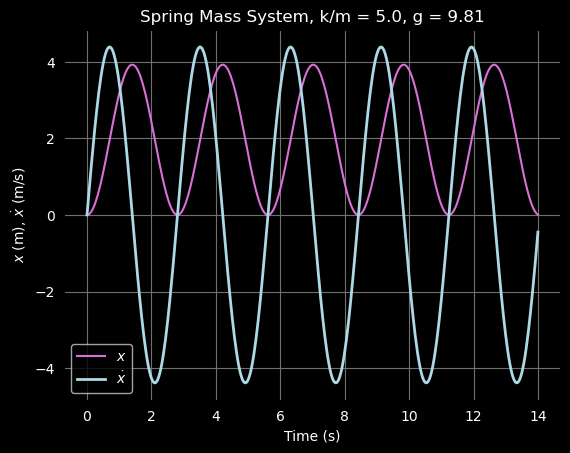

In [34]:

plt.plot(t, x, 'orchid', label = r'$x$')
plt.plot(t, x_dot, 'lightblue', lw = 2, label = r'$\dot x$')
plt.title(f'Spring Mass System, k/m = {k/m}, g = {g}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel(r'$x$ (m), $\dot x$ (m/s)')
plt.grid()
plt.show()

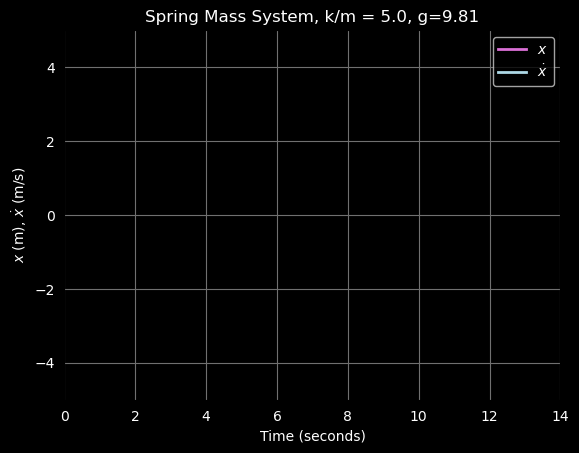

In [35]:
# animate theta, theta_dot vs time

fig, ax = plt.subplots()

x_curve, = ax.plot(t[0], x[0], 'orchid', lw=2, label=r'$x$')
x_dot_curve, = ax.plot(t[0], x_dot[0], 'lightblue', lw=2, label = r'$\dot x$')

# make plot pretty
ax.set_title(f'Spring Mass System, k/m = {k/m}, g={g}')
ax.set_xlim(0, tfinal)
ax.set_ylim(-5, 5)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$x$ (m), $\dot x$ (m/s)')
ax.legend([r'$x$', r'$\dot x$'])
ax.grid()

def animate(i):
    x_curve.set_data(t[:i+1], x[:i+1])
    x_dot_curve.set_data(t[:i+1], x_dot[:i+1])

# save video @ 30 fps
anim = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
anim.save('time_domain.mp4', writer=ffmpeg_writer)

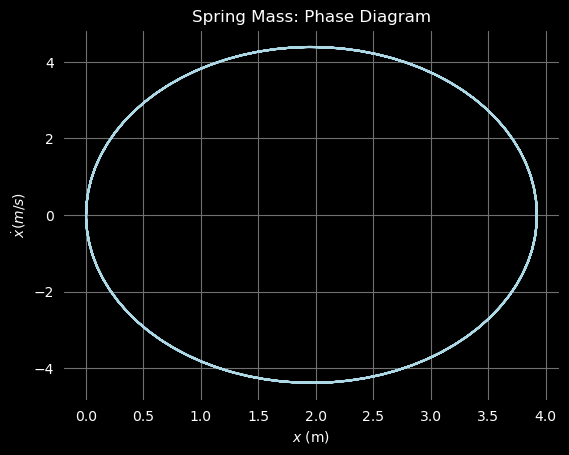

In [36]:
# create a phase diagram of x, x_dot
plt.plot(x, x_dot, 'lightblue')
plt.title('Spring Mass: Phase Diagram')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\dot x (m/s)$')
plt.grid()
plt.show()

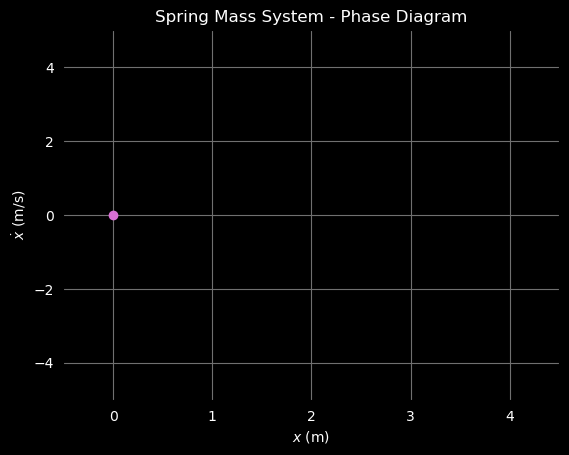

In [37]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(x[0], x_dot[0], 'lightblue')
phase_dot, =  ax.plot(x[0], x_dot[0], c='orchid', marker='o')

ax.set_title('Spring Mass System - Phase Diagram')
ax.set_ylim(-5, 5)
ax.set_xlim(-0.5, 4.5)
ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$\dot x$ (m/s)')
ax.grid()

def animate(i):
    phase_curve.set_data(x[:i+1], x_dot[:i+1])
    phase_dot.set_data([x[i]], [x_dot[i]])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('phase_diagram.mp4', writer=ffmpeg_writer)
# ani.save('phase_diagram_with_friction.mp4', writer=ffmpeg_writer)

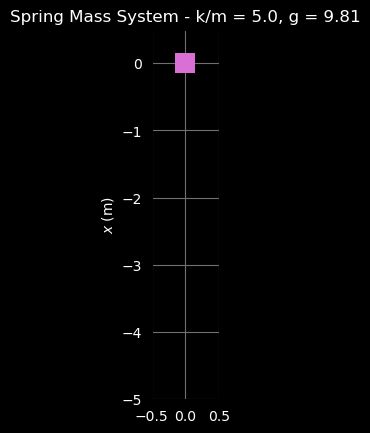

In [38]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(x):
    return (x, 0)

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_title(f'Spring Mass System - k/m = {k/m}, g = {g}')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-5, 0.5)
ax.set_ylabel(r'$x$ (m)')
ax.grid()

x00, y00 = pend_pos(x0)
line, = ax.plot([0, y00], [0, -x00], lw=2, c='lightblue')
rectangle = ax.add_patch(plt.Rectangle(pend_pos(x0), 0.3, 0.3, fc='orchid', zorder=3))

# animate each frame "i"
def animate(i):
    x1,y1 = pend_pos(x[i])
    line.set_data([0, y1], [0, -x1])
    rectangle.set_xy((y1-0.15, -x1-0.15))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('spring-mass.mp4', writer=ffmpeg_writer)

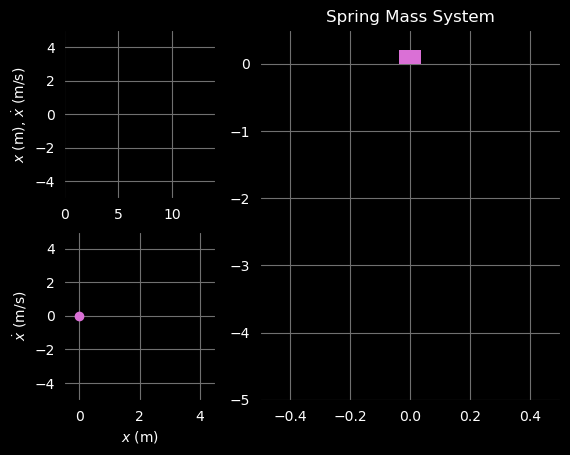

In [45]:
# animate everything together!
fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])

# theta, theta_dot vs time
ax0 = fig.add_subplot(gs[0,0])
# ax0.set_title(f'Spring Mass System, k/m = {k/m}, g={g}')
ax0.set_xlim(0, tfinal)
ax0.set_ylim(-5, 5)
# ax0.set_xlabel('Time (seconds)')
ax0.set_ylabel(r'$x$ (m), $\dot x$ (m/s)')
# ax0.legend([r'$x$', r'$\dot x$'])
ax0.grid()

x_curve, = ax0.plot(t[0], x[0], 'orchid', lw=2, label=r'$x$')
x_dot_curve, = ax0.plot(t[0], x_dot[0], 'lightblue', lw=2, label = r'$\dot x$')

# phase diagram
ax1 = fig.add_subplot(gs[1,0])
# ax1.set_title('Spring Mass System - Phase Diagram')
ax1.set_ylim(-5, 5)
ax1.set_xlim(-0.5, 4.5)
ax1.set_xlabel(r'$x$ (m)')
ax1.set_ylabel(r'$\dot x$ (m/s)')
ax1.grid()

phase_curve, = ax1.plot(x[0], x_dot[0], 'lightblue')
phase_dot, =  ax1.plot(x[0], x_dot[0], c='orchid', marker='o')

# create an animation of the pendulum swining with Matplotlib
def pend_pos(x):
    return (x, 0)

ax2 = fig.add_subplot(gs[:,1])
# ax2 = fig.add_subplot(aspect='equal')
ax2.set_title(f'Spring Mass System')
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-5, 0.5)
# ax2.set_ylabel(r'$x$ (m)')
ax2.grid()

# draw the pendulum
x00, y00 = pend_pos(x0)
line, = ax2.plot([0, y00], [0, -x00], lw=2, c='lightblue')
rectangle = ax2.add_patch(plt.Rectangle(pend_pos(x0), 0.075, 0.2, fc='orchid', zorder=3))


def animate(i):
    x_curve.set_data(t[:i+1], x[:i+1])
    x_dot_curve.set_data(t[:i+1], x_dot[:i+1])

    phase_curve.set_data(x[:i+1], x_dot[:i+1])
    phase_dot.set_data([x[i]], [x_dot[i]])

    x1,y1 = pend_pos(x[i])
    line.set_data([0, y1], [0, -x1])
    rectangle.set_xy((y1-0.0375, -x1))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('all.mp4', writer=ffmpeg_writer)